In [1]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline 

from skimage.color import rgb2gray
from skimage import filter


from skimage import feature

from skimage import io

import math

**Black**: R = G = B = 0  
**White**: R = G = B = 255  
**Transparent**: alpha = 0  
**Opaque**: alpha = 1

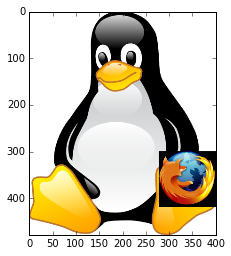

(479, 400, 4)
(191600, 4)
   red  green  blue  alpha
0    0      0     0      0
1    0      0     0      0
2    0      0     0      0
3    0      0     0      0
4    0      0     0      0
Height: 479
Width: 400
Channels: 4
   red  green  blue  alpha
0  255    255   255      0
1  255    255   255      0
2  255    255   255      0
3  255    255   255      0
4  255    255   255      0
(479, 400)
(479, 400)
[(187, 3), (188, 3), (189, 3), (190, 3), (191, 3), (192, 3), (193, 3), (194, 3), (195, 3), (196, 3)]


In [8]:
fnames = ['1675pwl.png']
fpath = '../data/'
fname = fpath + fnames[0]
url = 'http://oi29.tinypic.com/1675pwl.jpg'
#im = ndimage.imread(fname)
im = io.imread(url)
plt.imshow(im)
plt.show()


print im.shape
columns = ['red', 'green','blue','alpha']
df = pd.DataFrame(data=im.reshape((479*400),4),  columns=columns)
print df.shape
print df.head()

height, width, channels = im.shape
print "Height: %i" %(height)
print "Width: %i" %(width)
print "Channels: %i" %(channels)


df_x = df.copy()
df_x['red'] = df_x.apply(lambda x: 255. if x.alpha==0 else 0., axis=1)
df_x['green'] = df_x.apply(lambda x: 255. if x.alpha==0 else 0., axis=1)
df_x['blue'] = df_x.apply(lambda x: 255. if x.alpha==0 else 0., axis=1)
print df_x.head()

im_x = df_x.as_matrix()
im_x = im_x.reshape(479, 400, 4)



im_x = df_x[['red']].as_matrix()
im_x = im_x.reshape(479, 400)

print im_x.shape


gry = rgb2gray(im_x)
val = filter.threshold_otsu(gry)
mask = im_x < val
print mask.shape


edges = filter.canny(mask)

polygon = []
x = []
y = []
for i in range(height):
    for j in range(width):
        if edges[i,j] == 1:
            x.append(j); y.append(i)
            polygon.append((j,i))

print polygon[:10]

In [7]:
print edges.shape
print height
print width
print
print edges[:5,:5]

(479, 400)
479
400

[[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]


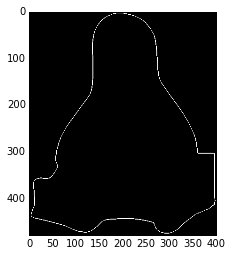

In [9]:
plt.imshow(edges, cmap='gray')

72.0


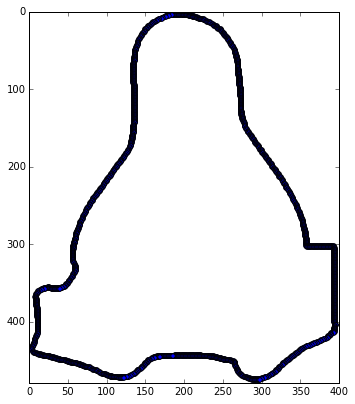

In [11]:
dpi = 72.
xinch = width / dpi
yinch = height / dpi
fig = plt.figure(figsize=(xinch,yinch),dpi=dpi)
print fig.get_dpi()
plt.xlim(0,width)
plt.ylim(height,0)
plt.scatter(x,y)
plt.show()

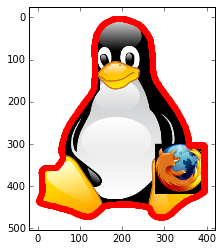

In [17]:
plt.imshow(im)
plt.scatter(x,y,color='red')
plt.show()

## Next:  Order list of scattered points that make up a polygon

In [9]:
# However, polygon is a list of scattered coordinates that make up the edges of a polygon
# The next step is to order the coordinates so that they can be used to drawing a polygon path
pp = polygon
# First, compute the centroid
cent = (sum([p[0] for p in pp])/len(pp),sum([p[1] for p in pp])/len(pp))
# Next, sort by polar angle
pp.sort(key=lambda p: math.atan2(p[1]-cent[1],p[0]-cent[0]))

print pp[:10]

[(63, 280), (64, 280), (64, 279), (64, 278), (64, 277), (65, 277), (65, 276), (65, 275), (66, 274), (66, 273)]


## Finally: Plot the polygon path from the ordered points

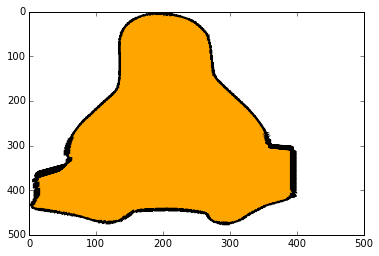

In [14]:
from matplotlib.path import Path
import matplotlib.patches as patches

verts = pp

codes = []
code = [Path.MOVETO]
codes = codes + code
for i in range(len(verts)-2):
    code = [Path.LINETO]
    codes = codes + code
codes = codes + [Path.CLOSEPOLY]

path = Path(verts, codes)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.set_ylim(500,0)
ax.set_xlim(0,500)

plt.show()